# Vehicle Price Prediction

## Multi-Linear Regression Modelling
> ### Author: Lu (Christina) Jin

# Setup: Import all libraries

In [1]:
install.packages("plyr")
install.packages("FSA")
install.packages("FSAdata")
install.packages("magrittr")
install.packages("dplyr")
install.packages("plotrix")
install.packages("ggplot2")
#install.packages("tidyverse")
install.packages("GGally")
install.packages("ISLR")
install.packages("moments")
install.packages("reticulate")
install.packages(c('tibble', 'dplyr', 'readr'))
install.packages("patchwork")
install.packages("fastDummies")
install.packages("carData")
install.packages("car")
install.packages("caret")
install.packages("lattice")
install.packages("regclass")

package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages
package 'FSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages
package 'FSAdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages
package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.5  1.0.6              TRUE

  Binaries will be installed
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages


In [2]:
library("plyr")
library("FSA")
library("FSAdata")
library("magrittr")
library("dplyr")
library("plotrix")
library("ggplot2")
library(tidyverse)
library(GGally)
library(ISLR)
library("moments")
library(colorspace)
library(RColorBrewer)
#library(vcd)
library(reticulate)
library(stringr)
library(patchwork)
library(tibble)
library(dplyr)
library(readr)
library('fastDummies')
library(caret)
library(plotly)
library(data.table)
library(tidymodels)
library(car)
library(scales)
library(lmtest)

Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'FSA' was built under R version 3.6.3"## FSA v0.8.32. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.
## FSAdata v0.3.8. See ?FSAdata to find data for specific fisheries analyses.
Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'plotrix' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R ver

In [262]:
install.packages("car")
library(vif)

package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lu_ki\AppData\Local\Temp\RtmpKCnEgh\downloaded_packages


ERROR: Error in library(vif): there is no package called 'vif'


In [3]:
#specifying which version to use
use_python('C:\\PROGRA~1\\Python35\\python.exe')
#importing required bridge libraries/modules
sns <- import('seaborn')
plt <- import('matplotlib.pyplot')
pd <- import('pandas')
matplotlib <- import("matplotlib")
matplotlib$use("Agg", force = TRUE)
plt <- import("matplotlib.pyplot")
fig <- plt$figure(figsize=c(14,8))

options( warn = -1 )

# Acquiring Dataset 

In [4]:
# Read data
car_price_df <- read.csv("C:/Users/Lu_ki/OneDrive - Northeastern University/Data Analytics Case Study Projects/Jupyter Notebook/Data Input/Car_Price.csv")
headtail(car_price_df,n=5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
201,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
202,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
203,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
204,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
205,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


# Part 1: Perform Basic Data Cleaning

In [36]:
# investigate data set
summary(car_price_df)
str(car_price_df)

     car_ID      symboling                 CarName      fueltype   aspiration 
 Min.   :  1   Min.   :-2.0000   peugeot 504   :  6   diesel: 20   std  :168  
 1st Qu.: 52   1st Qu.: 0.0000   toyota corolla:  6   gas   :185   turbo: 37  
 Median :103   Median : 1.0000   toyota corona :  6                           
 Mean   :103   Mean   : 0.8341   subaru dl     :  4                           
 3rd Qu.:154   3rd Qu.: 2.0000   honda civic   :  3                           
 Max.   :205   Max.   : 3.0000   mazda 626     :  3                           
                                 (Other)       :177                           
 doornumber        carbody   drivewheel enginelocation   wheelbase     
 four:115   convertible: 6   4wd:  9    front:202      Min.   : 86.60  
 two : 90   hardtop    : 8   fwd:120    rear :  3      1st Qu.: 94.50  
            hatchback  :70   rwd: 76                   Median : 97.00  
            sedan      :96                             Mean   : 98.76  
        

'data.frame':	205 obs. of  28 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : Factor w/ 147 levels "alfa-romero giulia",..: 1 3 2 4 5 9 5 7 6 8 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ doornumber      : Factor w/ 2 levels "four","two": 2 2 2 1 1 2 1 1 1 2 ...
 $ carbody         : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheel      : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : i

>**After checking the dataset, looks like there isn't any missing datas, but one thing caught my attention is that there are 147 levels of car name, let's take a closer look at the car names to see what is going on here.**

In [37]:
# listing distinct values in car name
unique(car_price_df$CarName)

[1] alfa-romero giulia              alfa-romero stelvio            
  [3] alfa-romero Quadrifoglio        audi 100 ls                    
  [5] audi 100ls                      audi fox                       
  [7] audi 5000                       audi 4000                      
  [9] audi 5000s (diesel)             bmw 320i                       
 [11] bmw x1                          bmw x3                         
 [13] bmw z4                          bmw x4                         
 [15] bmw x5                          chevrolet impala               
 [17] chevrolet monte carlo           chevrolet vega 2300            
 [19] dodge rampage                   dodge challenger se            
 [21] dodge d200                      dodge monaco (sw)              
 [23] dodge colt hardtop              dodge colt (sw)                
 [25] dodge coronet custom            dodge dart custom              
 [27] dodge coronet custom (sw)       honda civic                    
 [29] honda civic cvcc                honda accord cvcc              
 [31] honda accord lx                 honda civic 1500 gl            
 [33] honda accord                    honda civic 1300               
 [35] honda prelude                   honda civic (auto)             
 [37] isuzu MU-X                      isuzu D-Max                    
 [39] isuzu D-Max V-Cross             jaguar xj                      
 [41] jaguar xf                       jaguar xk                      
 [43] maxda rx3                       maxda glc deluxe               
 [45] mazda rx2 coupe                 mazda rx-4                     
 [47] mazda glc deluxe                mazda 626                      
 [49] mazda glc                       mazda rx-7 gs                  
 [51] mazda glc 4                     mazda glc custom l             
 [53] mazda glc custom                buick electra 225 custom       
 [55] buick century luxus (sw)        buick century                  
 [57] buick skyhawk                   buick opel isuzu deluxe        
 [59] buick skylark                   buick century special          
 [61] buick regal sport coupe (turbo) mercury cougar                 
 [63] mitsubishi mirage               mitsubishi lancer              
 [65] mitsubishi outlander            mitsubishi g4                  
 [67] mitsubishi mirage g4            mitsubishi montero             
 [69] mitsubishi pajero               Nissan versa                   
 [71] nissan gt-r                     nissan rogue                   
 [73] nissan latio                    nissan titan                   
 [75] nissan leaf                     nissan juke                    
 [77] nissan note                     nissan clipper                 
 [79] nissan nv200                    nissan dayz                    
 [81] nissan fuga                     nissan otti                    
 [83] nissan teana                    nissan kicks                   
 [85] peugeot 504                     peugeot 304                    
 [87] peugeot 504 (sw)                peugeot 604sl                  
 [89] peugeot 505s turbo diesel       plymouth fury iii              
 [91] plymouth cricket                plymouth satellite custom (sw) 
 [93] plymouth fury gran sedan        plymouth valiant               
 [95] plymouth duster                 porsche macan                  
 [97] porcshce panamera               porsche cayenne                
 [99] porsche boxter                  renault 12tl                   
[101] renault 5 gtl                   saab 99e                       
[103] saab 99le                       saab 99gle                     
[105] subaru                          subaru dl                      
[107] subaru brz                      subaru baja                    
[109] subaru r1                       subaru r2                      
[111] subaru trezia                   subaru tribeca                 
[113] toyota corona mark ii           toyota corona                  
[115] toyota

>**Looks like that the car brand and model under the brand has been put together all in one column - "CarName", which is the reason resulting in as much as 147 differen names. For easy operation later on, I would like to separate them apart, with the first word in the string being extracted as the car brand, and the rest of the words in the string as car model.**

In [38]:
car_price_df$brand <- word(car_price_df$CarName, 1)
car_price_df$model <- word(car_price_df$CarName, 2, -1)

unique(car_price_df$brand)
unique(car_price_df$model)

[1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "maxda"       "mazda"      
[11] "buick"       "mercury"     "mitsubishi"  "Nissan"      "nissan"     
[16] "peugeot"     "plymouth"    "porsche"     "porcshce"    "renault"    
[21] "saab"        "subaru"      "toyota"      "toyouta"     "vokswagen"  
[26] "volkswagen"  "vw"          "volvo"

[1] "giulia"                    "stelvio"                  
  [3] "Quadrifoglio"              "100 ls"                   
  [5] "100ls"                     "fox"                      
  [7] "5000"                      "4000"                     
  [9] "5000s (diesel)"            "320i"                     
 [11] "x1"                        "x3"                       
 [13] "z4"                        "x4"                       
 [15] "x5"                        "impala"                   
 [17] "monte carlo"               "vega 2300"                
 [19] "rampage"                   "challenger se"            
 [21] "d200"                      "monaco (sw)"              
 [23] "colt hardtop"              "colt (sw)"                
 [25] "coronet custom"            "dart custom"              
 [27] "coronet custom (sw)"       "civic"                    
 [29] "civic cvcc"                "accord cvcc"              
 [31] "accord lx"                 "civic 1500 gl"            
 [33] "accord"                    "civic 1300"               
 [35] "prelude"                   "civic (auto)"             
 [37] "MU-X"                      "D-Max "                   
 [39] "D-Max V-Cross"             "xj"                       
 [41] "xf"                        "xk"                       
 [43] "rx3"                       "glc deluxe"               
 [45] "rx2 coupe"                 "rx-4"                     
 [47] "626"                       "glc"                      
 [49] "rx-7 gs"                   "glc 4"                    
 [51] "glc custom l"              "glc custom"               
 [53] "electra 225 custom"        "century luxus (sw)"       
 [55] "century"                   "skyhawk"                  
 [57] "opel isuzu deluxe"         "skylark"                  
 [59] "century special"           "regal sport coupe (turbo)"
 [61] "cougar"                    "mirage"                   
 [63] "lancer"                    "outlander"                
 [65] "g4"                        "mirage g4"                
 [67] "montero"                   "pajero"                   
 [69] "versa"                     "gt-r"                     
 [71] "rogue"                     "latio"                    
 [73] "titan"                     "leaf"                     
 [75] "juke"                      "note"                     
 [77] "clipper"                   "nv200"                    
 [79] "dayz"                      "fuga"                     
 [81] "otti"                      "teana"                    
 [83] "kicks"                     "504"                      
 [85] "304"                       "504 (sw)"                 
 [87] "604sl"                     "505s turbo diesel"        
 [89] "fury iii"                  "cricket"                  
 [91] "satellite custom (sw)"     "fury gran sedan"          
 [93] "valiant"                   "duster"                   
 [95] "macan"                     "panamera"                 
 [97] "cayenne"                   "boxter"                   
 [99] "12tl"                      "5 gtl"                    
[101] "99e"                       "99le"                     
[103] "99gle"                     NA                         
[105] "dl"                        "brz"                      
[107] "baja"                      "r1"                       
[109] "r2"                        "trezia"                   
[111] "tribeca"                   "corona mark ii"           
[113] "corona"                    "corolla 1200"             
[115] "corona hardtop"            "corolla 1600 (sw)"        
[117] "carina"                    "mark ii"                  
[119] "corolla"                   "corolla liftback"         
[121] "celica gt liftback"        "corolla tercel"           
[123] "corona liftback"           "starlet"                  
[125] "tercel"                    "cressida"                 
[127] "celica gt"                 "rabbit"                   
[129] "1131 deluxe sedan"         

>**Now that the brand names and model names has been separated into two new columns. But one more thing we need to treat the data is that some of the brand names are the same brand but since they are written differently, result in being recognized as two different entries. So next, I'm going to clean this up a little more by merging the same brand together.**

In [39]:
car_price_df$brand[car_price_df$brand == "maxda"] <-"mazda"
car_price_df$brand[car_price_df$brand == "Nissan"] <-"nissan"
car_price_df$brand[car_price_df$brand == "porcshce"] <-"porsche"
car_price_df$brand[car_price_df$brand == "toyouta"] <-"toyota"
car_price_df$brand[car_price_df$brand == "vokswagen"] <-"volkswagen"
car_price_df$brand[car_price_df$brand == "vw"] <-"volkswagen"

unique(car_price_df$brand)

[1] "alfa-romero" "audi"        "bmw"         "chevrolet"   "dodge"      
 [6] "honda"       "isuzu"       "jaguar"      "mazda"       "buick"      
[11] "mercury"     "mitsubishi"  "nissan"      "peugeot"     "plymouth"   
[16] "porsche"     "renault"     "saab"        "subaru"      "toyota"     
[21] "volkswagen"  "volvo"

>**Now we have successfully cleaned the 28 brand names into 22. Finally I'm going to delete the "CarName" column and replace the location of this column with the two new columns that I just ceated - "brand", and "model".**

In [40]:
car_price <- subset(car_price_df, select = -c(car_ID, CarName))
car_price %>% relocate(brand, model, .after = symboling)

symboling,brand,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00
2,audi,fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.00
1,audi,100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.00
1,audi,5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.00
1,audi,4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.00
0,audi,5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.17


In [41]:
str(car_price)

'data.frame':	205 obs. of  26 variables:
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ fueltype        : Factor w/ 2 levels "diesel","gas": 2 2 2 2 2 2 2 2 2 2 ...
 $ aspiration      : Factor w/ 2 levels "std","turbo": 1 1 1 1 1 1 1 1 2 2 ...
 $ doornumber      : Factor w/ 2 levels "four","two": 2 2 2 1 1 2 1 1 1 2 ...
 $ carbody         : Factor w/ 5 levels "convertible",..: 1 1 3 4 4 4 4 5 4 3 ...
 $ drivewheel      : Factor w/ 3 levels "4wd","fwd","rwd": 3 3 3 2 1 2 2 2 2 1 ...
 $ enginelocation  : Factor w/ 2 levels "front","rear": 1 1 1 1 1 1 1 1 1 1 ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : Factor w/ 7 levels "dohc","dohcv",..: 1 1 6 4 4 4 4 4 4 4 ...
 

# Part 2: Exploratory Data Analysis

>**Now we have clean and the highest quality data to work with. Next we are going to discover the relationship between attributes of a vehicle and their price, and possibly predict vehicle prices on these attributes.**
>
>**But first we need to split the data into categorical and numerical subsets so we can better understand the relationship.**

In [42]:
# change symboling to factor 
#car_price$symboling <- as.character(car_price$symboling)

In [43]:
car_price_cat = car_price[c(25,2:7,13,14,16,24)] 
car_price_num = Filter(is.numeric, car_price)

head(car_price_cat)
head(car_price_num)

brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450
audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,15250


symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


## Categorical Attributes Exploration

### Car Brand

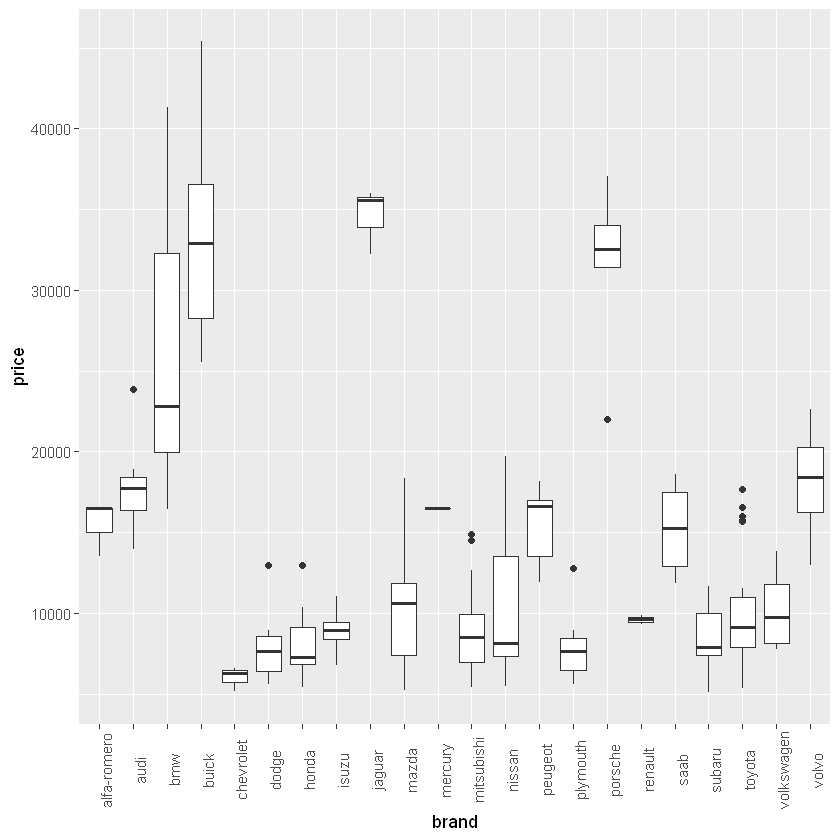

In [13]:
# brand vs price
p1 = ggplot(car_price_cat) + aes(x = brand, y = price) + geom_boxplot()

p1 + theme(axis.text.x = element_text(angle = 90))

In [14]:
# calulate average price for each brand and rank
avg_price = aggregate(car_price_cat$price, list(car_price_cat$brand), FUN=mean, decreasing = TRUE) 

names(avg_price)[1] <- "brand"
names(avg_price)[2] <- "avg_price"

avg_price %>% arrange(desc(avg_price))

brand,avg_price
jaguar,34600.000
buick,33647.000
porsche,31400.500
bmw,26118.750
volvo,18063.182
audi,17859.167
mercury,16503.000
alfa-romero,15498.333
peugeot,15489.091
saab,15223.333


>**More data processing below.**

In [44]:
# create a new column in the main dataset with the data that we just got - avg price for each brand 
car_price_cat$brand_avg_price <- avg_price$avg_price[match(car_price_cat$brand, avg_price$brand)]

# categorize the brand by their average price into 3 classes: budget, mid-class, and luxury cars
car_price_cat <- car_price_cat %>% mutate(brand_category  =
                     case_when(brand_avg_price <= 10000 ~ "budget", 
                               brand_avg_price > 10000 & brand_avg_price <= 20000 ~ "mid-class",
                               brand_avg_price > 20000 ~ "luxury"))
car_price_cat

brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price,brand_avg_price,brand_category
alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.00,15498.333,mid-class
alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.00,15498.333,mid-class
alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.00,15498.333,mid-class
audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.00,17859.167,mid-class
audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.00,17859.167,mid-class
audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,15250.00,17859.167,mid-class
audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi,17710.00,17859.167,mid-class
audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi,18920.00,17859.167,mid-class
audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,23875.00,17859.167,mid-class
audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,17859.17,17859.167,mid-class


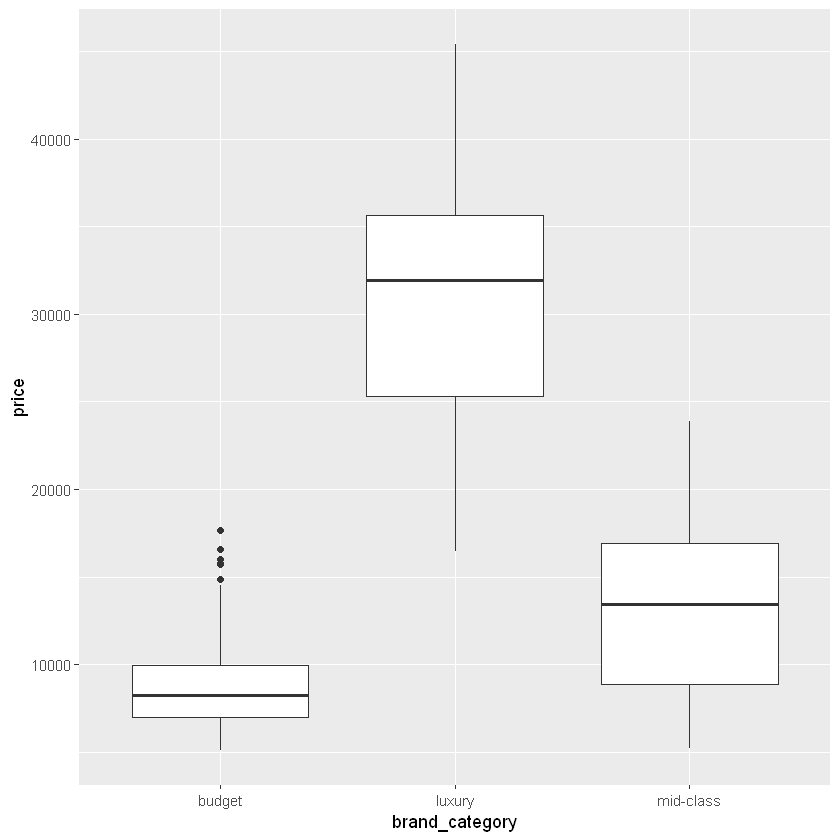

In [16]:
# brand category vs price
ggplot(car_price_cat) + aes(x = brand_category, y = price) + geom_boxplot()

#p1 + theme(axis.text.x = element_text(angle = 90))

>**Inference:**
>
> According to the average car price of each brand, we can see that Jaguar, Buick, Porsche, BMW are the brands that have the highest average price compare to others. 
>
> Brands of cars can be categorized into three classes base on their average price. They are luxury, mid-class, and budget.
>
> We can see that different brands, especailly different category of brands, does have a pretty drastic on the price of the car.

### Car Fuel Type

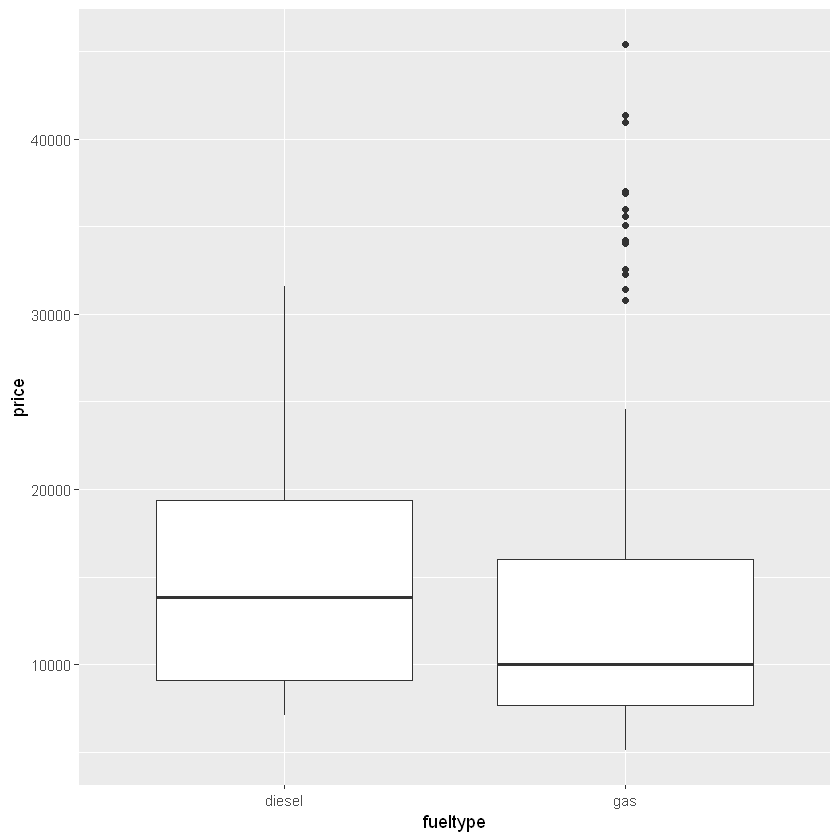

In [17]:
# fuel type vs price
ggplot(car_price_cat) + aes(x = fueltype, y = price) + geom_boxplot()

>**Inference:**
>
> According to the fuel type vs price boxplot, diesel is slightly pricier than gas fuel type car. But the difference is pretty small.

### Aspiration Type

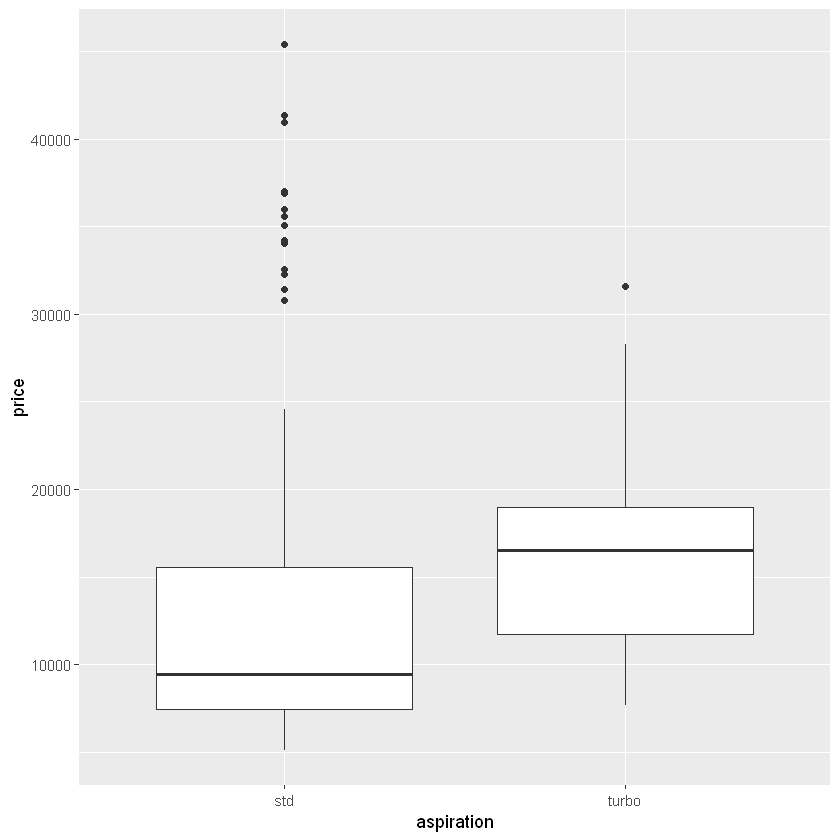

In [18]:
# aspirtion vs price
ggplot(car_price_cat) + aes(x = aspiration, y = price) + geom_boxplot()

>**Inference:**
>
> According to the aspiration vs price boxplot, turbo car generally has a higher price than standard aspiration cars. Aspiration has medium impact on the price.

### Number of Doors

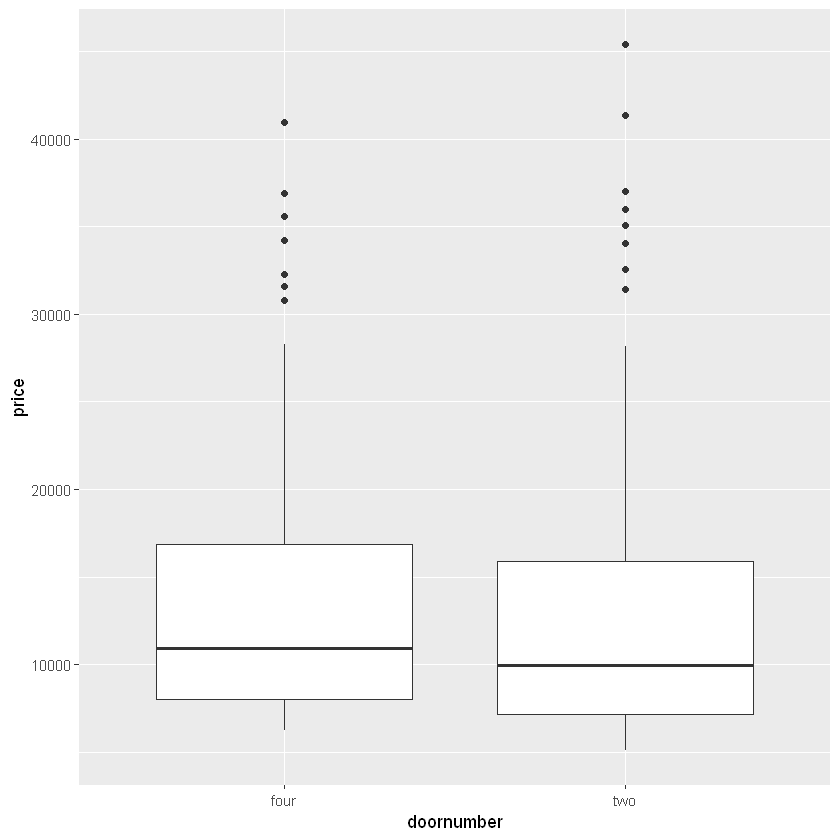

In [19]:
# door number vs price
ggplot(car_price_cat) + aes(x = doornumber, y = price) + geom_boxplot()

>**Inference:**
>
> According to the doornumber vs price boxplot, number of doors doesn't have much effect the price of the cars.

### Car Body Type

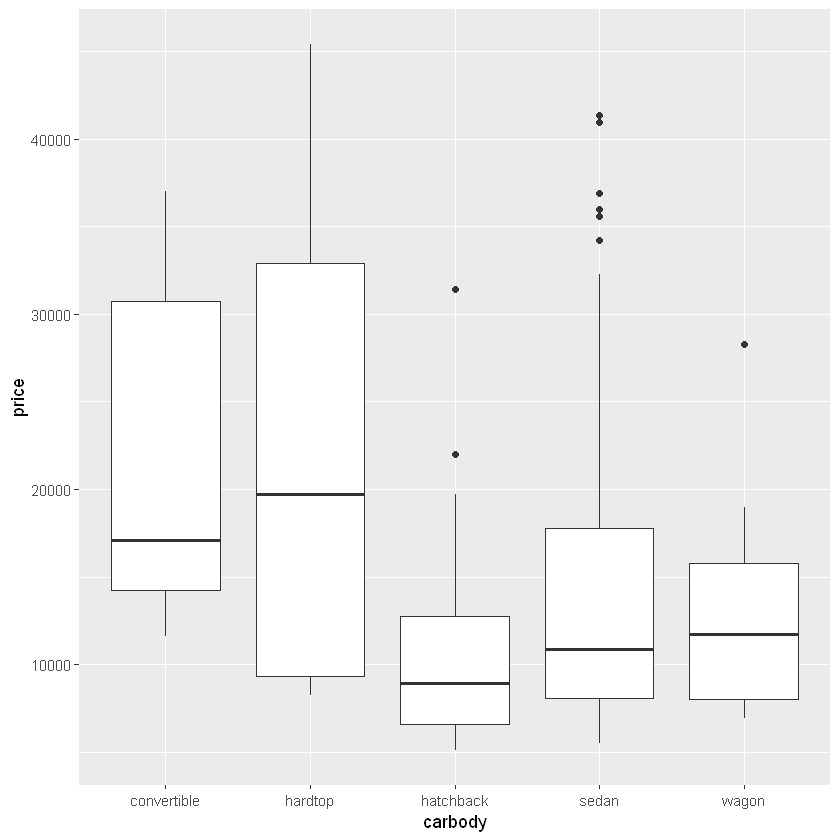

In [20]:
# car body vs price
ggplot(car_price_cat) + aes(x = carbody, y = price) + geom_boxplot()

>**Inference:**
>
> Hardtop and Convertible cars regularlly worth more than sedans and wagons, hatchback is the type that has the lowest price.

### Drive Wheel

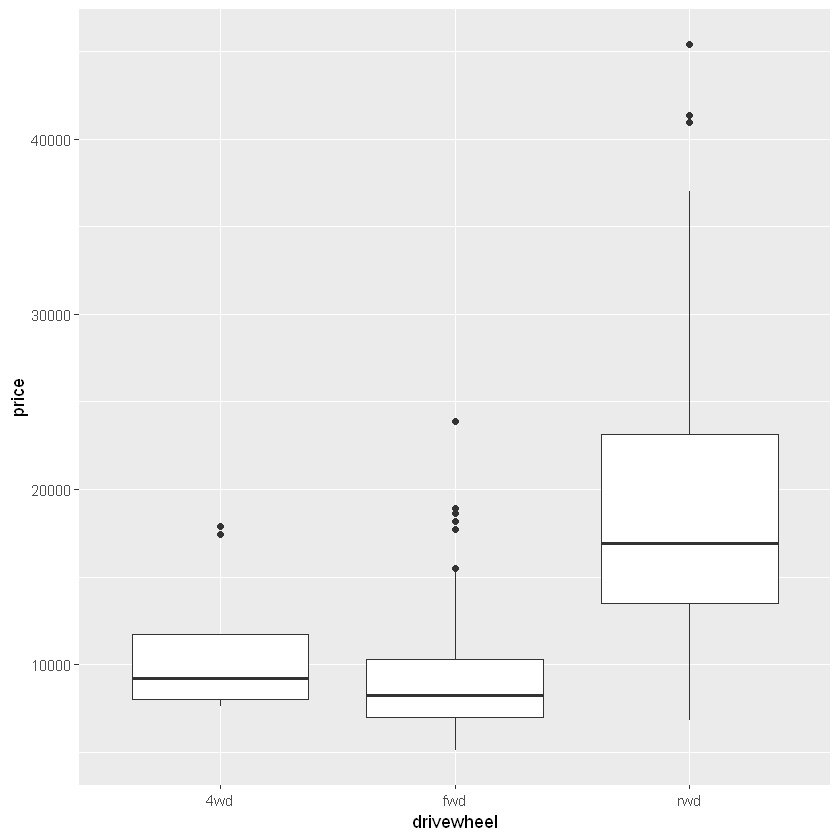

In [21]:
# drive wheel vs price
ggplot(car_price_cat) + aes(x = drivewheel, y = price) + geom_boxplot()

>**Inference:**
>
> rear wheel drive cars usually have a higer price than front wheel drive and all wheel drive.

### Engine Location

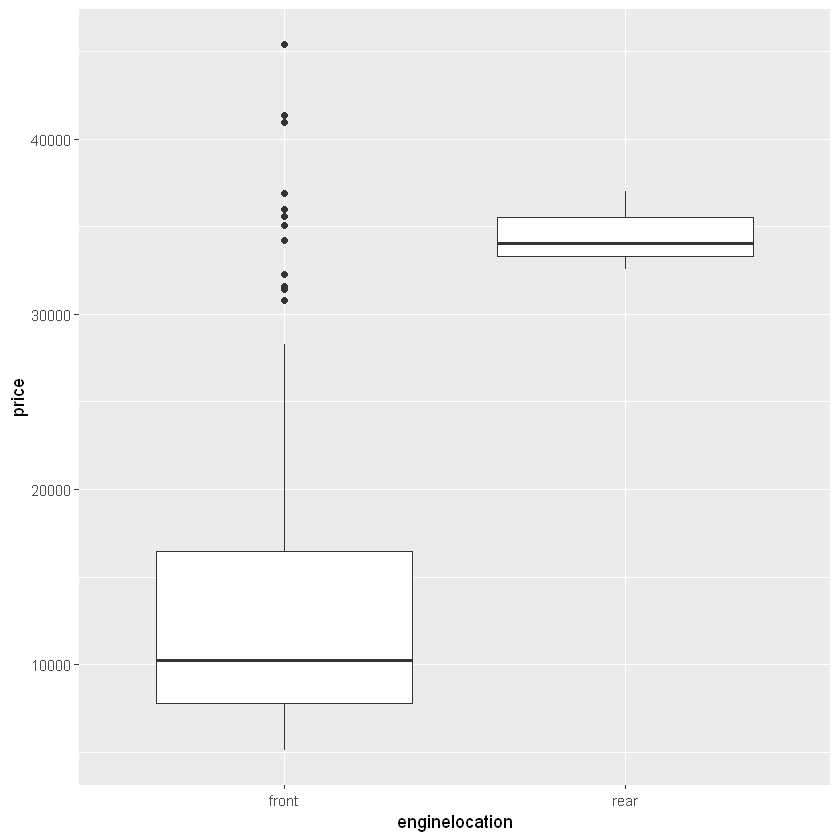

In [22]:
# engine location vs price
ggplot(car_price_cat) + aes(x = enginelocation, y = price) + geom_boxplot()

>**Inference:**
>
> From the plot we can see that for cars has an engine located in the rear has a drastic higher price than the ones with engine in the front. This implies that the engine location is a very significant factor in determine the price of cars.

### Engine Type

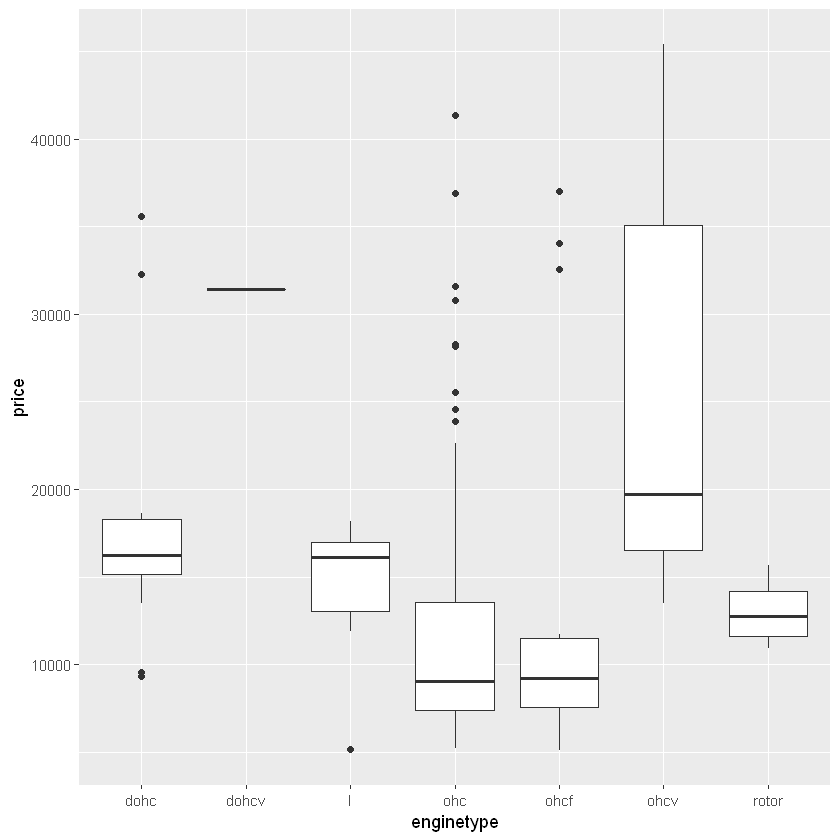

In [23]:
# engine type vs price
ggplot(car_price_cat) + aes(x = enginetype, y = price) + geom_boxplot()

>**Inference:**
>
> ohcv, dohc, and l type of engines of cars generally have a higher price than the rest.
>
> ohcv has a pretty big range prices.

### Number of Cylinders

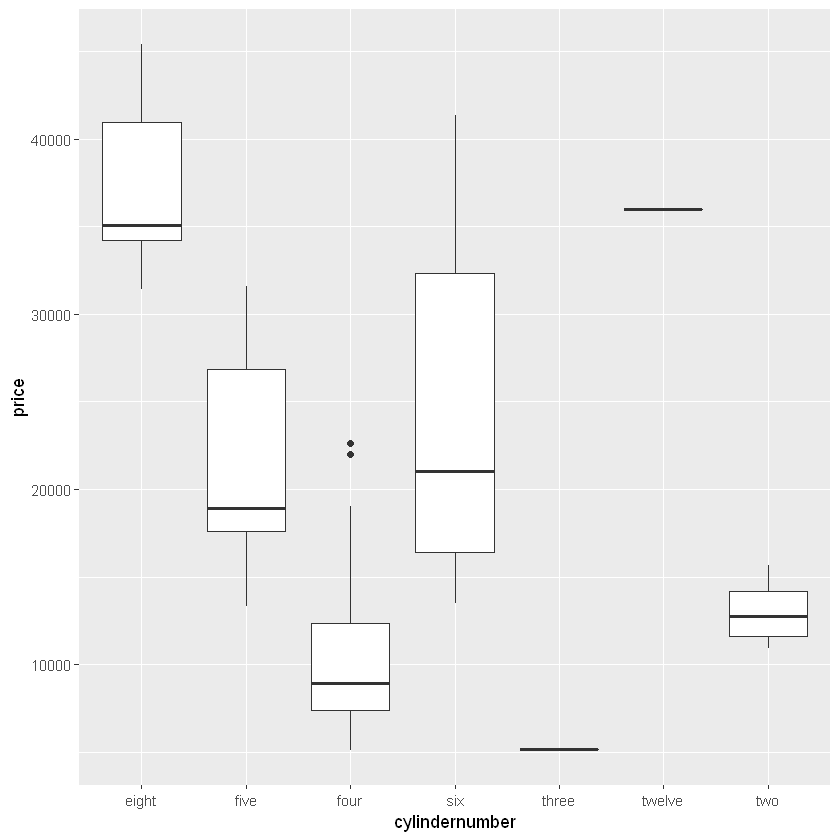

In [24]:
# engine type vs price
ggplot(car_price_cat) + aes(x = cylindernumber, y = price) + geom_boxplot()

>**Inference:**
>
> Cars with 8 or 12 cylinders generally have a much higher price than the rest.
>
> There are either not many cars with 3 cylinders, or their price don't flunctuate much.
>
> Cars with 3 cylinder is the type with the lowest price among all.

### Fuel Systems

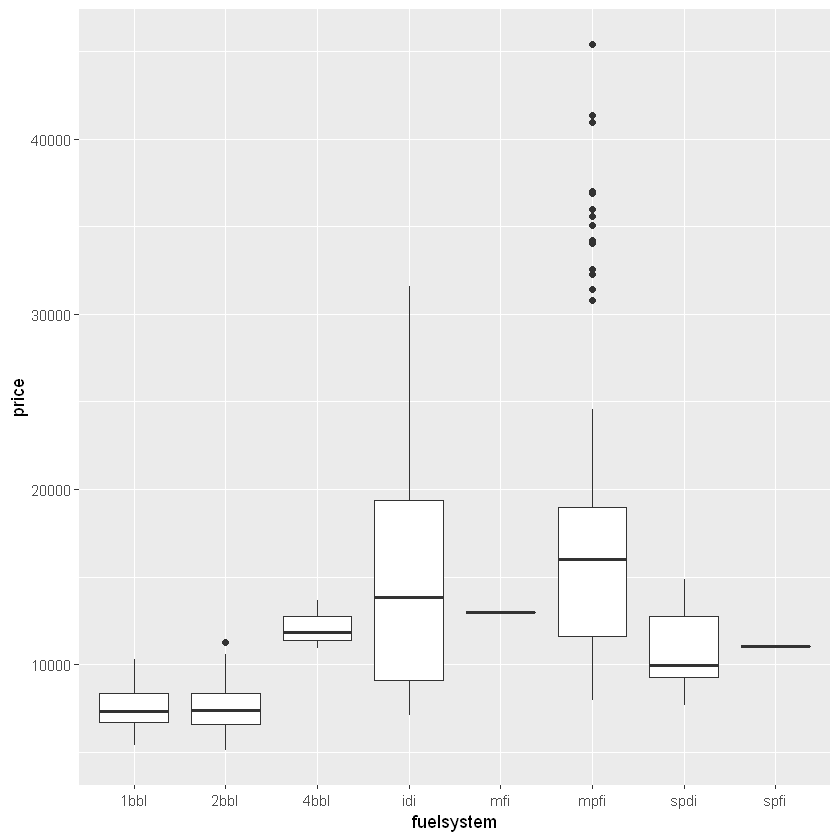

In [25]:
# engine type vs price
ggplot(car_price_cat) + aes(x = fuelsystem, y = price) + geom_boxplot()

>**Inference:**
>
> There isn't too much difference in pricing between cars with different fuel systems, but 1bbl and 2bbl generall has a lower price than others.

>**Summary Inference of Categorical Attributes:**
>
> From all the boxplots above, we can conclude that some of the factors that **DOES NOT** have much effect on price of cars are:
>>door number
>>
>>fuel system
>
>**The factors that has a strong impact on the price are:**
>>**brand category**
>>
>>**fuel type**
>>
>>**aspiration**
>>
>>**car body**
>>
>>**drive wheel**
>>
>>**engine location**
>>
>>**engine type**
>>
>>**cylinder number**

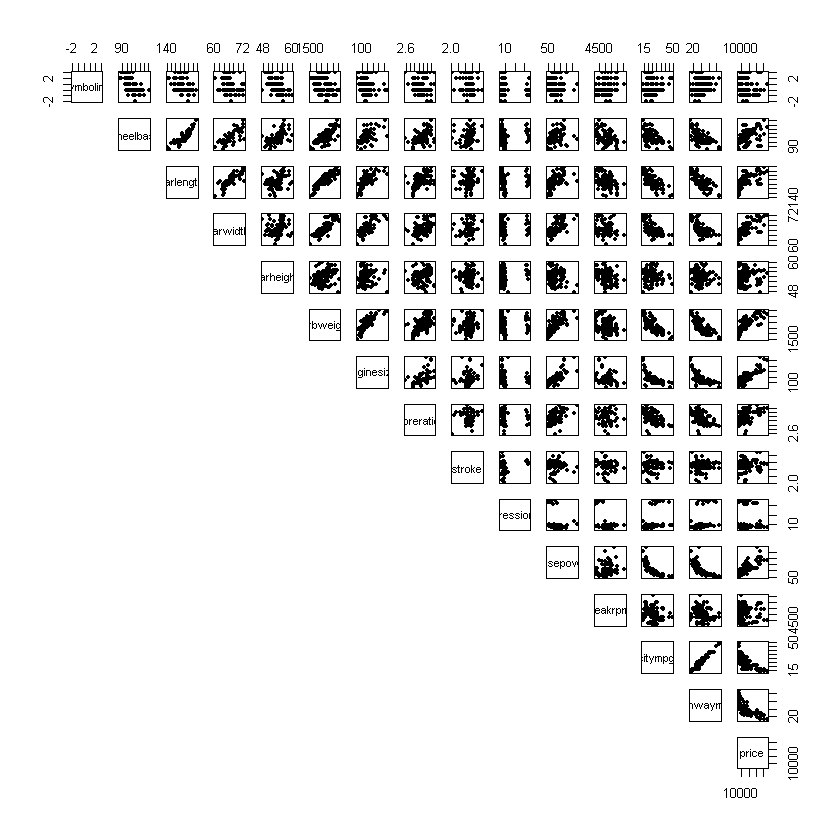

In [26]:
# pairplots of each categorical attribute
pairs(car_price_num, pch = 20, lower.panel = NULL)

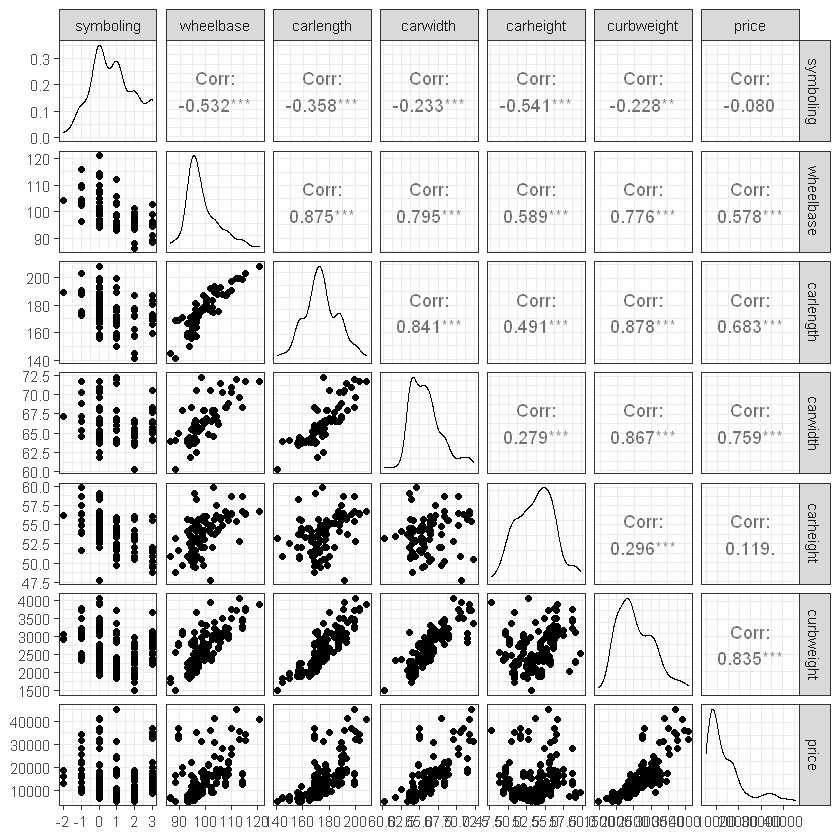

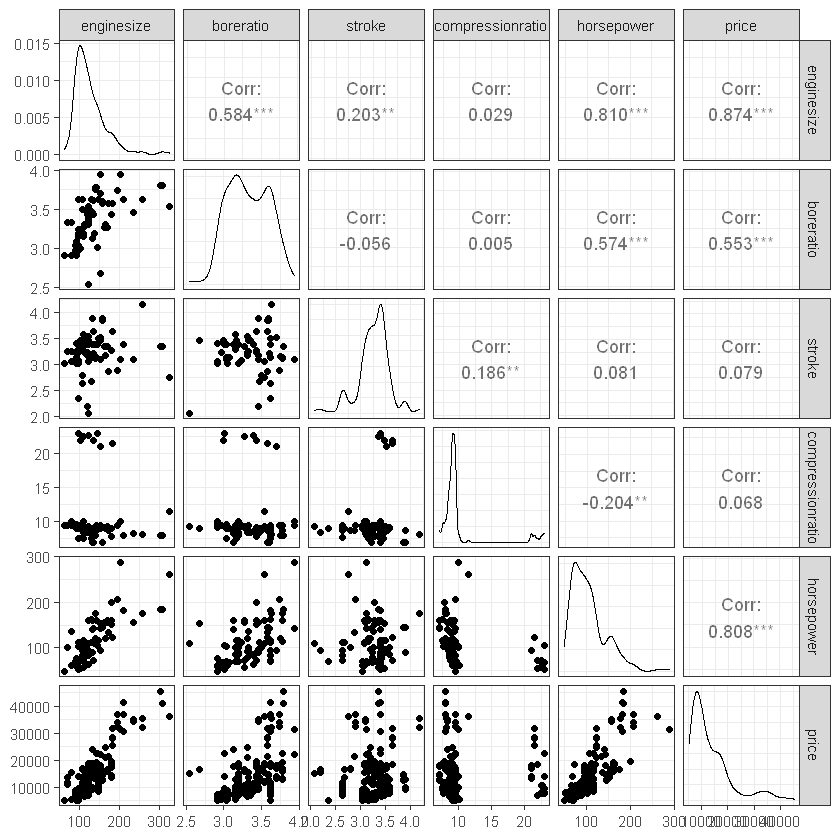

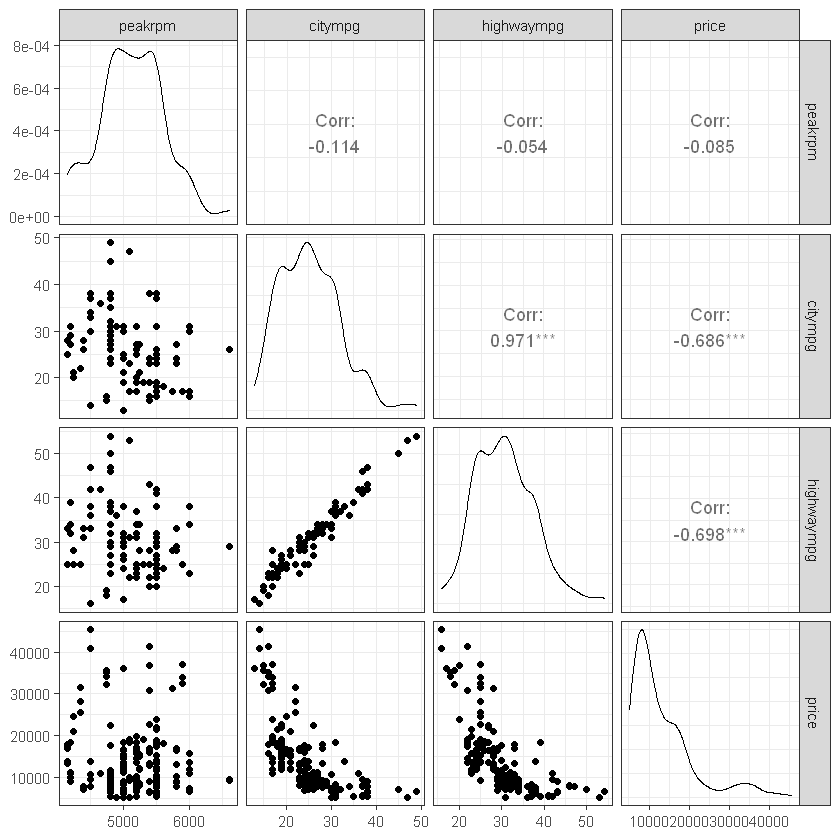

In [28]:
spec1 <- c("symboling","wheelbase","carlength","carwidth","carheight","curbweight","price")
spec2 <- c("enginesize","boreratio","stroke","compressionratio","horsepower","price")
spec3 <- c("peakrpm","citympg","highwaympg","price")

# spec1 vs price = 
ggpairs(car_price_num[spec1]) + theme_bw()
# spec2 vs price = 
ggpairs(car_price_num[spec2]) + theme_bw()
# spec3 vs price = 
ggpairs(car_price_num[spec3]) + theme_bw()


>**Summary Inference of Numerical Attributes:**
>
> From the correlation plots above, we can conclude that some of the factors that **DOES NOT** have much effect on price of cars are:
>>symboling(risk rating)
>>
>>car height
>>
>>strock
>>
>>compression ratio
>>
>>peak rmp
>
>**The factors that are highly correlated with price are (ranked from most effective to least effective):**
>>**engine size (0.874)**
>>
>>**curb weight (0.835)**
>>
>>**horse power (0.808)**
>>
>>**car width (0.759)**
>>
>>**highway mpg (- 0.698) - negatively related**
>>
>>**city mpg (- 0.686) - negatively related**
>>
>>**car length (0.683)**
>>
>>**wheel base (0.578)**
>>
>>**bore ratio (0.553)**

# Part 3: Further Data Processing

In [163]:
car_price_num_clean = car_price_num[,c("price","enginesize","curbweight","horsepower","carwidth","highwaympg","citympg","carlength","wheelbase","boreratio")]
car_price_cat_clean = car_price_cat[,c("brand_category","fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","cylindernumber")]

head(car_price_num_clean)
head(car_price_cat_clean)

price,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,wheelbase,boreratio
13495,130,2548,111,64.1,27,21,168.8,88.6,3.47
16500,130,2548,111,64.1,27,21,168.8,88.6,3.47
16500,152,2823,154,65.5,26,19,171.2,94.5,2.68
13950,109,2337,102,66.2,30,24,176.6,99.8,3.19
17450,136,2824,115,66.4,22,18,176.6,99.4,3.19
15250,136,2507,110,66.3,25,19,177.3,99.8,3.19


brand_category,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber
mid-class,gas,std,convertible,rwd,front,dohc,four
mid-class,gas,std,convertible,rwd,front,dohc,four
mid-class,gas,std,hatchback,rwd,front,ohcv,six
mid-class,gas,std,sedan,fwd,front,ohc,four
mid-class,gas,std,sedan,4wd,front,ohc,five
mid-class,gas,std,sedan,fwd,front,ohc,five


>**Create dummy variables for categorical attributes**

In [164]:
car_price_cat_dummy = dummy_columns(car_price_cat_clean)
car_price_cat_dummy = car_price_cat_dummy %>% select(-(1:8))
headtail(car_price_cat_dummy)

,brand_category_budget,brand_category_luxury,brand_category_mid-class,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
1,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
203,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
204,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
205,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


>**Now we have a clean numerical subset and a clean categorical dummies subet ready, next we are going to combine the two and create and train our model.**

In [165]:
car_price_clean = cbind(car_price_num_clean,car_price_cat_dummy)
headtail(car_price_clean)
str(car_price_clean)

,price,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,wheelbase,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
1,13495,130,2548,111,64.1,27,21,168.8,88.6,3.47,...,0,0,0,0,0,1,0,0,0,0
2,16500,130,2548,111,64.1,27,21,168.8,88.6,3.47,...,0,0,0,0,0,1,0,0,0,0
3,16500,152,2823,154,65.5,26,19,171.2,94.5,2.68,...,0,1,0,0,0,0,1,0,0,0
203,21485,173,3012,134,68.9,23,18,188.8,109.1,3.58,...,0,1,0,0,0,0,1,0,0,0
204,22470,145,3217,106,68.9,27,26,188.8,109.1,3.01,...,0,0,0,0,0,0,1,0,0,0
205,22625,141,3062,114,68.9,25,19,188.8,109.1,3.78,...,0,0,0,0,0,1,0,0,0,0


'data.frame':	205 obs. of  41 variables:
 $ price                   : num  13495 16500 16500 13950 17450 ...
 $ enginesize              : int  130 130 152 109 136 136 136 136 131 131 ...
 $ curbweight              : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ horsepower              : int  111 111 154 102 115 110 110 110 140 160 ...
 $ carwidth                : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ highwaympg              : int  27 27 26 30 22 25 25 25 20 22 ...
 $ citympg                 : int  21 21 19 24 18 19 19 19 17 16 ...
 $ carlength               : num  169 169 171 177 177 ...
 $ wheelbase               : num  88.6 88.6 94.5 99.8 99.4 ...
 $ boreratio               : num  3.47 3.47 2.68 3.19 3.19 3.19 3.19 3.19 3.13 3.13 ...
 $ brand_category_budget   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand_category_luxury   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand_category_mid-class: int  1 1 1 1 1 1 1 1 1 1 ...
 $ fueltype_diesel         : int  0 0 0 

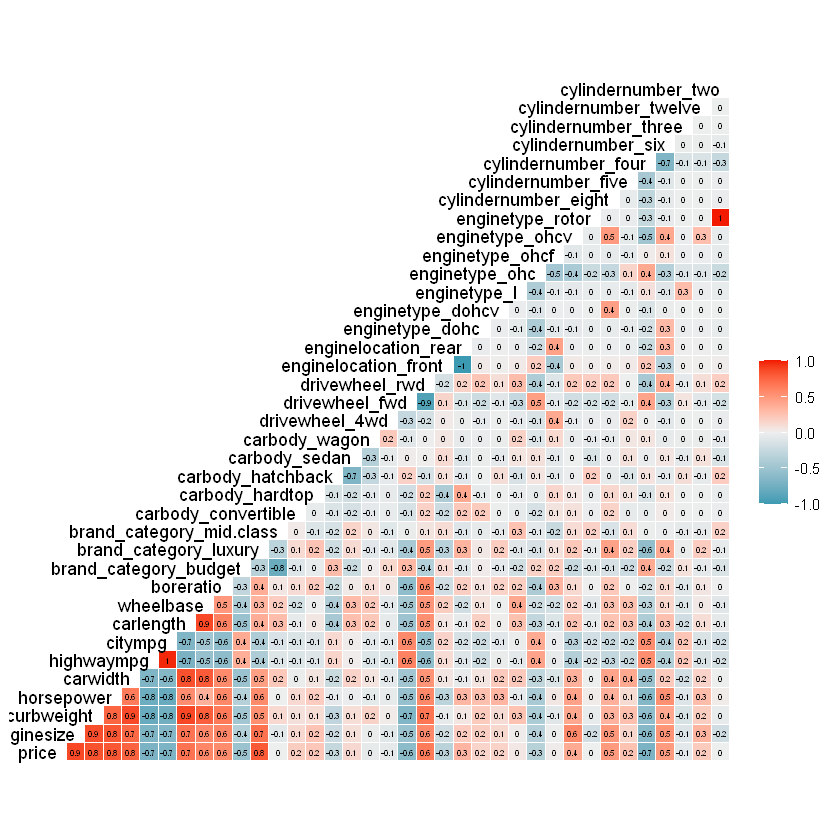

In [276]:
ggcorr(car_price_clean, label=TRUE, label_size = 1.75, hjust = 1, layout.exp=2)

>**From the matric above, we can conclude that fuel type and asprication does affect the car price as much as we thought they are, so I'm going to take these two variables off our list.**

In [166]:
car_price_clean = car_price_clean %>% select(-starts_with("fueltype"),-starts_with("aspiration"))
headtail(car_price_clean)

,price,enginesize,curbweight,horsepower,carwidth,highwaympg,citympg,carlength,wheelbase,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
1,13495,130,2548,111,64.1,27,21,168.8,88.6,3.47,...,0,0,0,0,0,1,0,0,0,0
2,16500,130,2548,111,64.1,27,21,168.8,88.6,3.47,...,0,0,0,0,0,1,0,0,0,0
3,16500,152,2823,154,65.5,26,19,171.2,94.5,2.68,...,0,1,0,0,0,0,1,0,0,0
203,21485,173,3012,134,68.9,23,18,188.8,109.1,3.58,...,0,1,0,0,0,0,1,0,0,0
204,22470,145,3217,106,68.9,27,26,188.8,109.1,3.01,...,0,0,0,0,0,0,1,0,0,0
205,22625,141,3062,114,68.9,25,19,188.8,109.1,3.78,...,0,0,0,0,0,1,0,0,0,0


# Part 4: Multilinear Linear Regression Modeling and Optimization

### Split Dataset for Training and Testing

In [242]:
set.seed(1)
sampsize <- round(0.7 * nrow(car_price_clean), 0)
sample <- sample(seq_len(nrow(car_price_clean)), size = sampsize)

price_train <- car_price_clean[sample, ]
price_test <- car_price_clean[-sample, ]

### Build Model

In [278]:
set.seed(1)
price_mod <- lm(price~., price_train)
summary(price_mod)


Call:
lm(formula = price ~ ., data = price_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4306.4  -966.4     0.0   796.3  5328.9 

Coefficients: (8 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -20647.989  11796.730  -1.750 0.082731 .  
enginesize                      7.980     16.866   0.473 0.637005    
curbweight                      6.251      1.369   4.565 1.26e-05 ***
horsepower                     64.388     12.383   5.200 8.78e-07 ***
carwidth                      317.960    210.113   1.513 0.132952    
highwaympg                     86.004    109.140   0.788 0.432306    
citympg                        61.440    112.414   0.547 0.585746    
carlength                     -43.169     44.232  -0.976 0.331129    
wheelbase                     147.429     73.250   2.013 0.046484 *  
boreratio                   -3822.545   1384.135  -2.762 0.006696 ** 
brand_category_budget       -

### Model Optimization

In [247]:
# remove insignificant variables
car_price_clean2 <- car_price_clean %>% select(enginesize, curbweight, horsepower, carwidth, boreratio, starts_with("brand_category"),
                                         -"brand_category_mid-class", starts_with("carbody"), -"carbody_wagon", enginelocation_front,
                                         enginetype_ohcv, enginetype_dohcv, cylindernumber_eight, price)

price_train2 <- car_price_clean2[sample, ]
price_test2 <- car_price_clean2[-sample, ]

set.seed(1)
price_mod2 <- lm(price ~ ., data = price_train2)

summary(price_mod2)


Call:
lm(formula = price ~ ., data = price_train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5227.2 -1074.8    -5.2   753.6  6490.6 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -21264.802   9676.818  -2.197  0.02978 *  
enginesize                 4.658     10.693   0.436  0.66383    
curbweight                 5.003      0.882   5.672 8.93e-08 ***
horsepower                46.670      8.034   5.809 4.71e-08 ***
carwidth                 454.583    168.592   2.696  0.00795 ** 
boreratio              -2089.901    813.380  -2.569  0.01133 *  
brand_category_budget  -1209.854    370.769  -3.263  0.00141 ** 
brand_category_luxury   8022.429    781.400  10.267  < 2e-16 ***
carbody_convertible     2868.939    886.087   3.238  0.00153 ** 
carbody_hardtop          985.219    917.230   1.074  0.28479    
carbody_hatchback        648.144    571.097   1.135  0.25853    
carbody_sedan            909.447    521.789   1.743  0.0837

# Part 5: Model Evaluation

### Model 1

In [248]:
mod_pred <- predict(price_mod, newdata = price_test %>% select(-price))

# RMSE of train dataset
RMSE_train = RMSE(pred = price_mod$fitted.values, obs = price_train$price)
cat("Root Mean Squared Error of Train Dataset:", RMSE_train, "\n")

# RMSE of test dataset
RMSE_test = RMSE(pred = mod_pred, obs = price_test$price)
cat("Root Mean Squared Error of Test Dataset:", RMSE_test)

Root Mean Squared Error of Train Dataset: 1445.444 
Root Mean Squared Error of Test Dataset: 2858.189

### Model 2

In [267]:
mod_pred2 <- predict(price_mod2, newdata = price_test2 %>% select(-price))

# RMSE of train dataset
RMSE_train2 = RMSE(pred = price_mod2$fitted.values, obs = price_train2$price)
cat("Root Mean Squared Error of Train Dataset:", RMSE_train2, "\n")

# RMSE of test dataset
RMSE_test2 = RMSE(pred = mod_pred2, obs = price_test2$price)
cat("Root Mean Squared Error of Test Dataset:", RMSE_test2)

Root Mean Squared Error of Train Dataset: 1604.202 
Root Mean Squared Error of Test Dataset: 2613.329

>**Now we have a pairplot of MPG in response to all attributes, lets take an overview of the relationships of each. Displacement and Weight both have a quite strong negative relationship with MPG, meaning increase in the engine displacement or the weight of the car will result in lower MPG. The number of cylinders seems like having a slight negative relationship. Horsepower and Acceleration both have some what of a positive relationship with MPG but seemingly not very strong. The Model Year also have some impact on the MPG, models that are made in more recent years (later models) usually have a slight improvement in the miles per gallon. And finally, whether the vehicle is made in US or not doesn't affect MPG much, although the models that are not made in the US perform slightly better in MPG than US models, but it is very small and neglagible.**

# Part 6: Model Analysis and Conclusion 

#### Q1: What were the three most significant variables?

Just by looking at each individual attributes, the top significant variables are (ranked by significance):
>Engine size (0.874)
>
>Curb weight (0.835)
>
>Horse power (0.808)
>
>Luxury brand category 

According to the results of the model, the three most significant variables are (ranked by significance): 
>Cylinder number - eight
>
>Luxury brand category
>
>dohcv Type of engine

#### Q2: Of those three, which had the greatest positive influence on car prices?

Among these three, "cylinder number - eight" had the greatest positive influence on car prices. Cars with 8 cylinders will increase the car price by 9693.11 dollars. 

#### Q3: How accurate was the model?

The optimized model, with a precision rate of Multiple R-squared: 0.9609 and Adjusted R-squared: 0.9563. Although it is slightly lower in the r^2 score that the first model (0.9682), but the Root Mean Square Error (RMSE) rate is much lower than the first model. Thus, I would say It is doing a pretty good job in determine the price for cars with given attributes.